# Surprise Housing - Advanced Regression


## Problem Statement
A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a **price below their actual values and flip them on at a higher price**. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to **build a regression model using regularisation** in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The Surprise Housing wants to know:**

1. Which variables are significant in predicting the price of a house
2. How well those variables describe the price of a house
3. Also, determine the optimal value of lambda for ridge and lasso regression

******************

### Business Goal 
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

******************

### Procedure:
1. Step 1: Reading and Understanding the Data (EDA)
2. Step 2: Visualising the Data
    - Univarent Analysis
    - Bivarent analysis
    - Multivarent Analysis
3. Step 3: Data Preparation
4. Step 4: Splitting the Data into Training and Testing Sets
5. Step 5: Building a linear model
6. Step 6: Residual Analysis of the train data
7. step 7: Applying Ridge and Lasso

In [1]:
# importing all the important
import numpy as np #Libraray used for numerical python
import pandas as pd #Libraray used for dataframe

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt #Libraray used for plotting
import seaborn as sns #Libraray used for data visualization

# sklearn Libraray used for classification, predictive analytics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics #metrics module implements several loss, score, and utility functions to measure classification performance
import os # Python os system function allows us to run a command in the Python script
import random #contains a number of random number generation-related functions

# hide warnings
import warnings #Libraray used to ignore warnings due to version problems
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, mean_squared_error

## Reading and Understanding the Data (EDA)
a. Cleaning Data

In [2]:
surprise_house_data = pd.read_csv("/Users/amitkumar/Desktop/Personal/COURSES/UpGrad/2022_Batch/Assignment/AdvancedRegression/House-Price-Prediction/train.csv", encoding = 'utf-8')
surprise_house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the dimensions
surprise_house_data.shape

(1460, 81)

### a. Cleaning Data

In [4]:
missing_value = round((surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100, 2)
missing_value.loc[missing_value>20].sort_values()

FireplaceQu    47.26
Fence          80.75
Alley          93.77
MiscFeature    96.30
PoolQC         99.52
dtype: float64

- As we can see that five columns have more than 45% of missing values and will drop these 5 columns

In [5]:
surprise_house_data = surprise_house_data.drop(missing_value.loc[missing_value>20].index, axis=1)
surprise_house_data.shape

(1460, 76)

In [6]:
missing_value = round((surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100,2)
missing_value.loc[missing_value>0].sort_values()

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
LotFrontage     17.74
dtype: float64

- Here we can see LotFrontage having 17.74% missing value. And will get some insights 
- LotFrontage: Linear feet of street-connected to property

In [7]:
surprise_house_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [8]:
# To get the description of the dataset
surprise_house_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- We can clearly see that, we cannot impute any values in it, we will remove this variable cause it has 17% missing values

In [9]:
surprise_house_data = surprise_house_data.drop("LotFrontage", axis=1)
surprise_house_data.shape

(1460, 75)

In [10]:
missing_value = round( (surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100,2)
missing_value.loc[missing_value>0].sort_values()

Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

- Here we can see that some of the variables have an exact same missing value of 5.55% 
- We will go through it and get some insights

In [11]:
missing_col = missing_value[missing_value>5].index
for col in missing_col:
    print(f"{surprise_house_data[col].value_counts()} \n")

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1962.0    21
1958.0    21
1966.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1997.0    19
1960.0    19
1978.0    19
1954.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0

In [12]:
missing5_per = surprise_house_data[(surprise_house_data[missing_col[0]].isnull() & surprise_house_data[missing_col[1]].isnull() 
                           & surprise_house_data[missing_col[2]].isnull() & surprise_house_data[missing_col[3]].isnull() 
                           & surprise_house_data[missing_col[4]].isnull()) ]
missing5_per.shape

(81, 75)

In [13]:
round(missing5_per.shape[0]/surprise_house_data.shape[0] *100, 2)

5.55

- We found that **5.5%** of the missing data from **'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'** are **from the same Row.**
- We cannot remove it because here when we use isnull(), it takes **NA as NULL**
- But as per **Metadata**, they have mentioned **NA is "No Garage"**
- We cannot remove the category. Insteed we will give diffent name for it like **NO-GA than NA**
- However, **'GarageYrBlt'** is numeric(Date- Year garage was built), so for **NA**, we can use **YearBuilt** for it

In [14]:
for col in missing_col:
    if col != "GarageYrBlt":
        surprise_house_data[col] = surprise_house_data[col].apply(lambda x: "NO-GA" if x!=x else x)

In [15]:
def re_NA_t_BLDyr(year, buildyear):
    if year != year:
        return buildyear
    return year

In [16]:
surprise_house_data["GarageYrBlt"] = list(map(re_NA_t_BLDyr, surprise_house_data["GarageYrBlt"], surprise_house_data["YearBuilt"]))

### Rechecking the Missing Values

In [17]:
missing_value = round(surprise_house_data.isnull().sum()/surprise_house_data.shape[0] *100 ,2)
missing_value.loc[missing_value>0].sort_values()

Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
dtype: float64

- Here we can see that some of the variables have an missing value of 2.5 and above.
- We will go through it and get some insights

In [18]:
missing_col = missing_value.loc[missing_value>2].sort_values().index
for col in missing_col:
    print(f"{surprise_house_data[col].value_counts()} \n\n")

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 




In [19]:
missing_per02 = surprise_house_data[(surprise_house_data[missing_col[0]].isnull() & surprise_house_data[missing_col[1]].isnull() 
                            & surprise_house_data[missing_col[2]].isnull() & surprise_house_data[missing_col[3]].isnull()
                            & surprise_house_data[missing_col[4]].isnull()
                           )]
missing_per02.shape

(37, 75)

In [20]:
missing_per02.shape[0]/surprise_house_data.shape[0]*100

2.5342465753424657

In [21]:
missing_col

Index(['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'], dtype='object')

- Again we can see that **2.5%** of the missing data from **'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'** are **from the same Row**
- But we can't remove it because here when we use isnull(), it takes **NA as null** 
- But as per **Metadata** they have mentioned **NA is "No Basement"**
- So we basically can't remove this category
- Insteed we will give diffent name for it like **NO-BA than NA**

In [22]:
for col in missing_col:
    surprise_house_data[col] = surprise_house_data[col].apply(lambda x: "NO-BA" if x!=x else x )
surprise_house_data.shape

(1460, 75)

In [23]:
missing_value = round (surprise_house_data.isnull().sum()/surprise_house_data.shape[0]*100, 2)
missing_value.loc[missing_value>0].sort_values()

Electrical    0.07
MasVnrType    0.55
MasVnrArea    0.55
dtype: float64

In [24]:
missing_col = missing_value.loc[missing_value>0].sort_values().index
missing_col

Index(['Electrical', 'MasVnrType', 'MasVnrArea'], dtype='object')

- Here we can see that these three variables have only 0.55% missing values, so we can directly remove them cause we will still be left with more data. 

In [25]:
surprise_house_data = surprise_house_data[~(surprise_house_data[missing_col[0]].isnull() | surprise_house_data[missing_col[1]].isnull() 
           | surprise_house_data[missing_col[2]].isnull() 
           )]
surprise_house_data.shape

(1451, 75)

In [26]:
missing_value = round( surprise_house_data.isnull().sum()/surprise_house_data.shape[0]*100,2)
missing_value[missing_value>0].sort_values()

Series([], dtype: float64)

In [27]:
# Removing ID columns
surprise_house_data = surprise_house_data.drop("Id", axis=1)
surprise_house_data.shape

(1451, 74)

In [28]:
round(surprise_house_data.shape[0]/1460 *100 ,2)

99.38

- No missing values, only 0.62% are removed, and seven columns are removed.

## Step 2: Visualising the Data

In [29]:
# Let's narrow down on the columns and drop all unnecessary variables
surprise_house_data.nunique().sort_values()

Street              2
Utilities           2
CentralAir          2
HalfBath            3
PavedDrive          3
LandSlope           3
BsmtHalfBath        3
ExterQual           4
MasVnrType          4
GarageFinish        4
Fireplaces          4
KitchenAbvGr        4
KitchenQual         4
BsmtFullBath        4
LandContour         4
LotShape            4
FullBath            4
BsmtQual            5
Electrical          5
YrSold              5
HeatingQC           5
LotConfig           5
GarageCars          5
MSZoning            5
ExterCond           5
BsmtExposure        5
BldgType            5
BsmtCond            5
SaleCondition       6
Heating             6
GarageQual          6
GarageCond          6
RoofStyle           6
Foundation          6
BsmtFinType1        7
BsmtFinType2        7
GarageType          7
Functional          7
Condition2          8
HouseStyle          8
BedroomAbvGr        8
PoolArea            8
RoofMatl            8
Condition1          9
SaleType            9
OverallCon

- Here we can clearly see each variable has at least **two unique values**, so there is no need to remove any more variables

#### Dividing the Data into categorical columns and numeric columns for better visulaization

In [30]:
surprise_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   LotShape       1451 non-null   object 
 5   LandContour    1451 non-null   object 
 6   Utilities      1451 non-null   object 
 7   LotConfig      1451 non-null   object 
 8   LandSlope      1451 non-null   object 
 9   Neighborhood   1451 non-null   object 
 10  Condition1     1451 non-null   object 
 11  Condition2     1451 non-null   object 
 12  BldgType       1451 non-null   object 
 13  HouseStyle     1451 non-null   object 
 14  OverallQual    1451 non-null   int64  
 15  OverallCond    1451 non-null   int64  
 16  YearBuilt      1451 non-null   int64  
 17  YearRemodAdd   1451 non-null   int64  
 18  RoofStyl

In [31]:
# Getting only categorical variables
categorical = surprise_house_data.select_dtypes(include=['object'])
print(categorical.columns,"\n", categorical.shape[1])

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 
 38


In [32]:
# Getting only numeric variables. 
numeric = surprise_house_data.select_dtypes(exclude=['object'])
print(numeric.columns, "\n",numeric.shape[1])

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
 36


- We have 38 categorical variables and 36 numeric variables.

###  a. Univarent Analysis

In [33]:
# Below given function is used to plot multiple barPlots graphs.
def barplots(idx, col, figsize=(7,7)):
    plt.figure(idx)
    plt.figure(figsize=figsize)
    keys = surprise_house_data[col].value_counts().keys()
    values = surprise_house_data[col].value_counts().values
    sns.barplot(keys, values, palette="nipy_spectral")
    plt.show()

In [34]:
unique_cat = categorical.nunique().sort_values()
unique_cat

Street            2
CentralAir        2
Utilities         2
PavedDrive        3
LandSlope         3
KitchenQual       4
ExterQual         4
MasVnrType        4
LandContour       4
LotShape          4
GarageFinish      4
Electrical        5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
BsmtQual          5
MSZoning          5
ExterCond         5
BldgType          5
LotConfig         5
GarageCond        6
GarageQual        6
Heating           6
SaleCondition     6
RoofStyle         6
Foundation        6
BsmtFinType2      7
Functional        7
GarageType        7
BsmtFinType1      7
HouseStyle        8
Condition2        8
RoofMatl          8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

<Figure size 432x288 with 0 Axes>

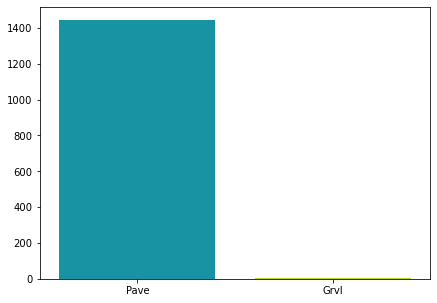

<Figure size 432x288 with 0 Axes>

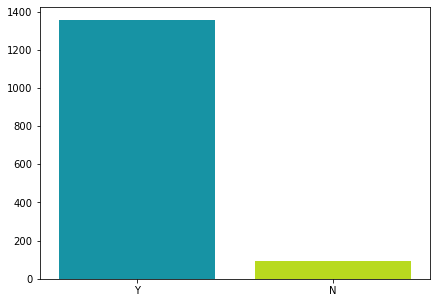

<Figure size 432x288 with 0 Axes>

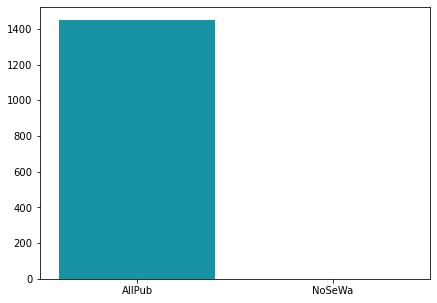

<Figure size 432x288 with 0 Axes>

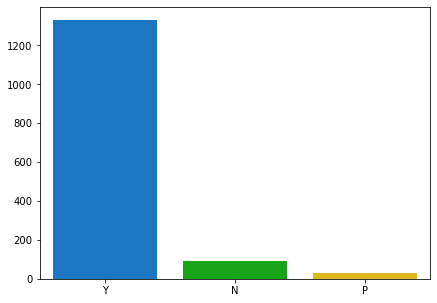

<Figure size 432x288 with 0 Axes>

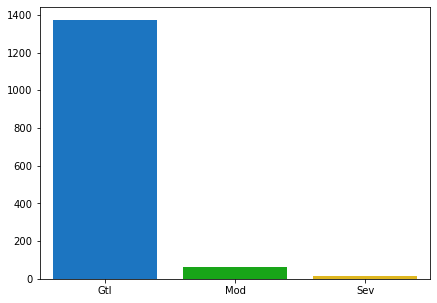

<Figure size 432x288 with 0 Axes>

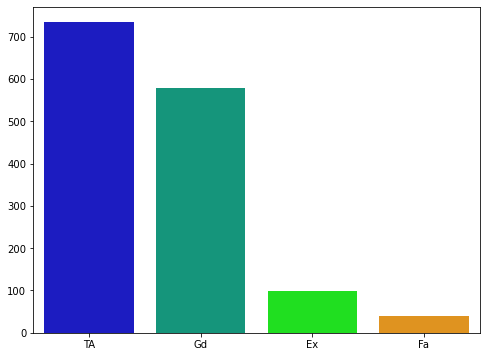

<Figure size 432x288 with 0 Axes>

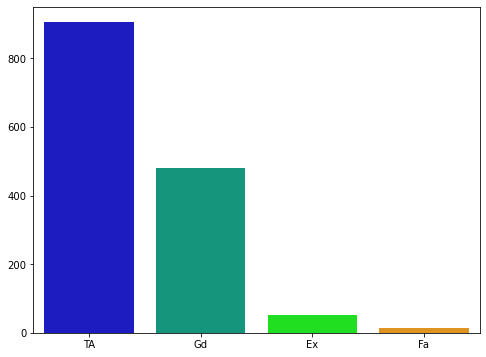

<Figure size 432x288 with 0 Axes>

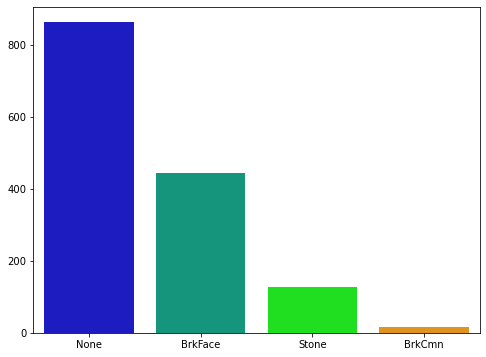

<Figure size 432x288 with 0 Axes>

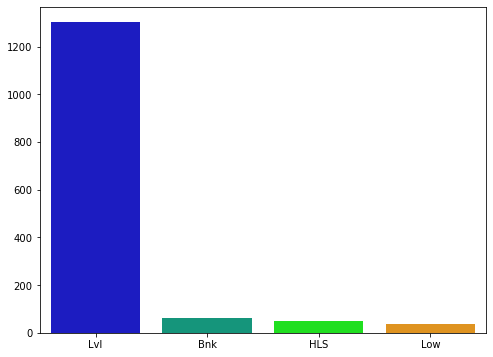

<Figure size 432x288 with 0 Axes>

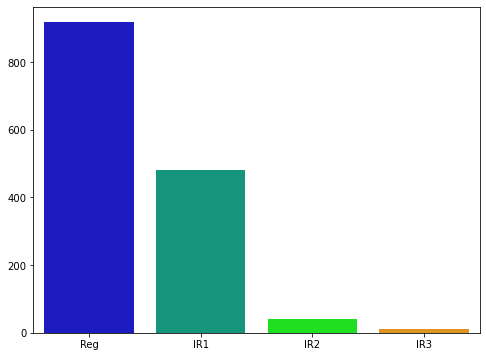

<Figure size 432x288 with 0 Axes>

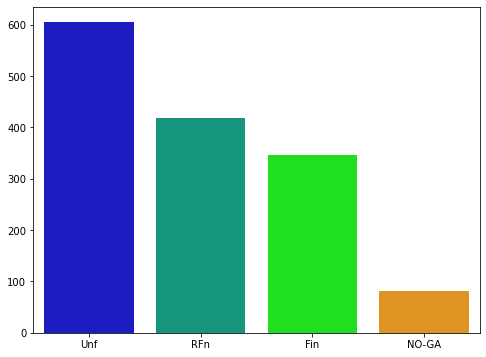

<Figure size 432x288 with 0 Axes>

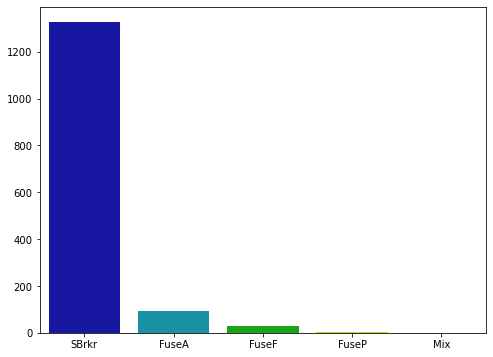

<Figure size 432x288 with 0 Axes>

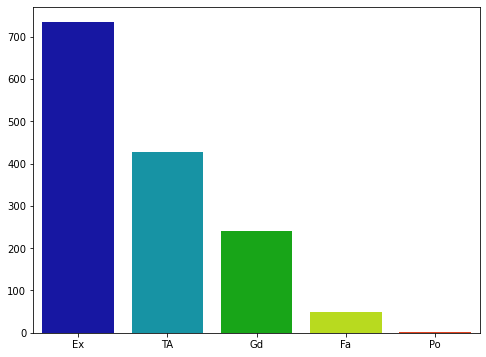

<Figure size 432x288 with 0 Axes>

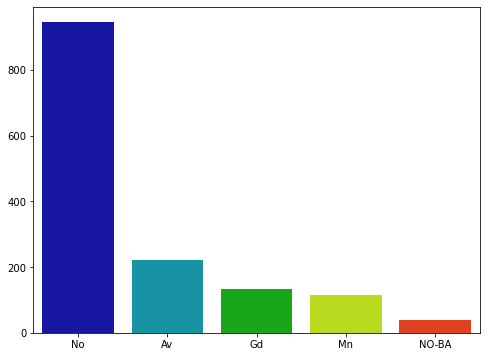

<Figure size 432x288 with 0 Axes>

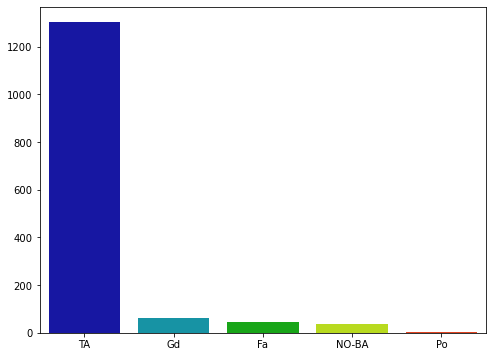

<Figure size 432x288 with 0 Axes>

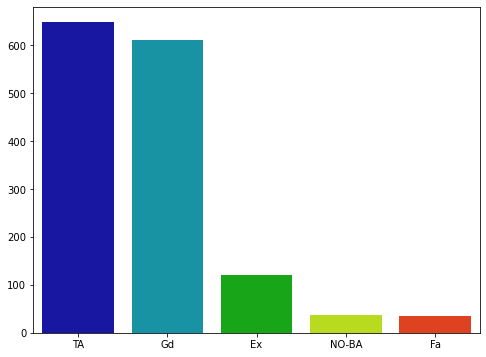

<Figure size 432x288 with 0 Axes>

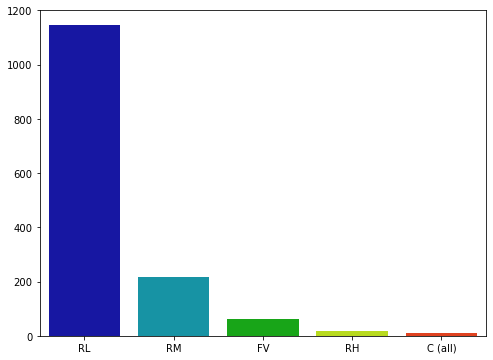

<Figure size 432x288 with 0 Axes>

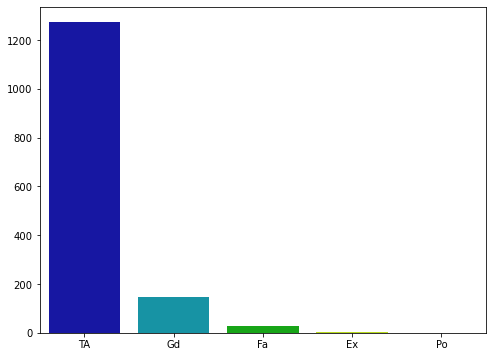

<Figure size 432x288 with 0 Axes>

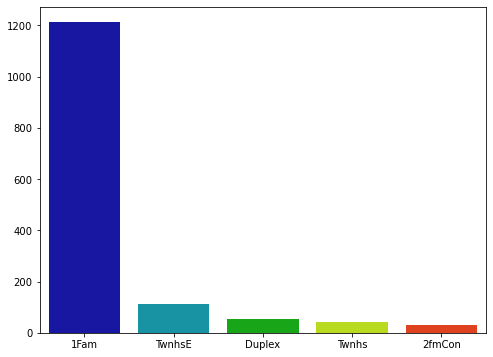

<Figure size 432x288 with 0 Axes>

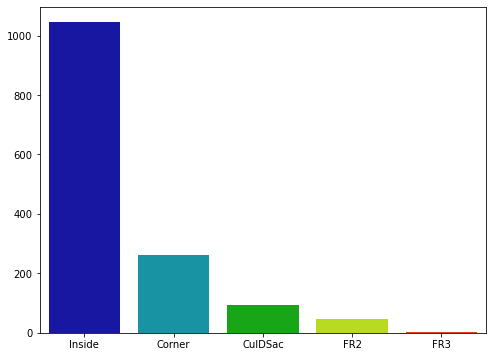

<Figure size 432x288 with 0 Axes>

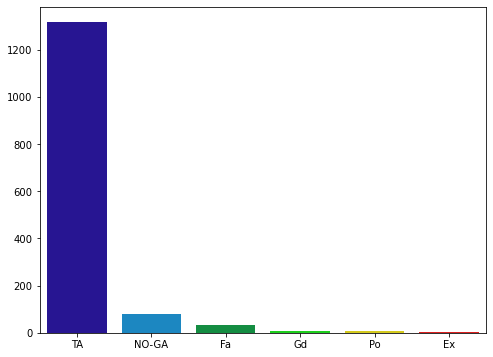

<Figure size 432x288 with 0 Axes>

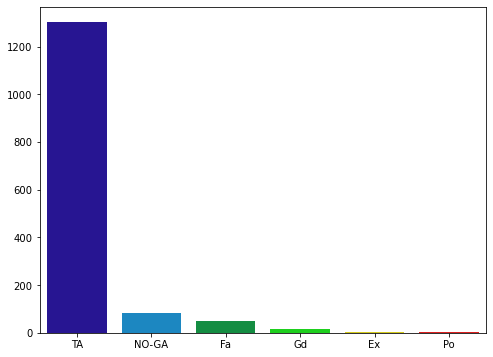

<Figure size 432x288 with 0 Axes>

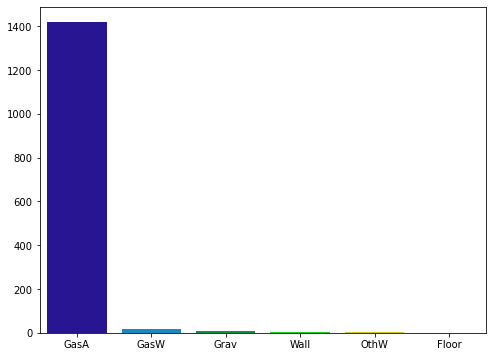

<Figure size 432x288 with 0 Axes>

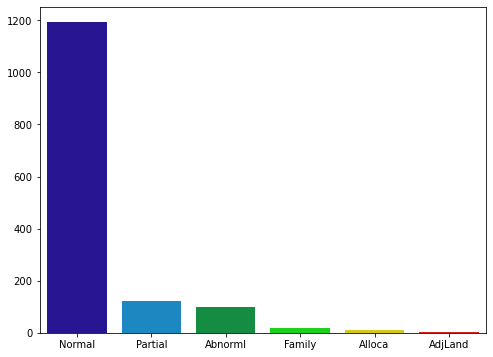

<Figure size 432x288 with 0 Axes>

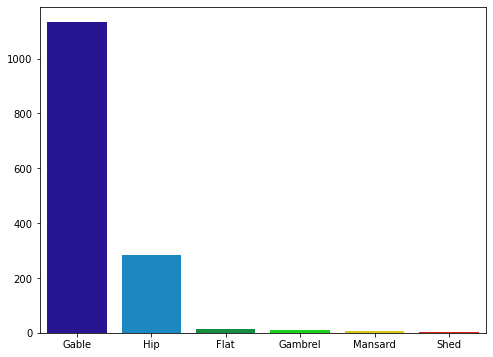

<Figure size 432x288 with 0 Axes>

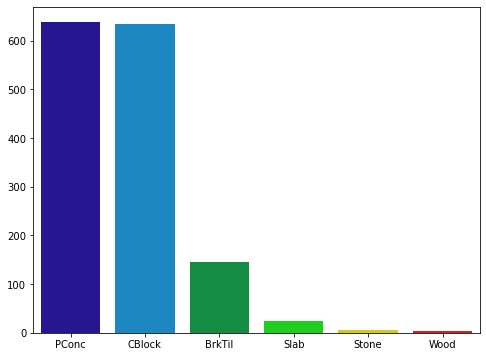

<Figure size 432x288 with 0 Axes>

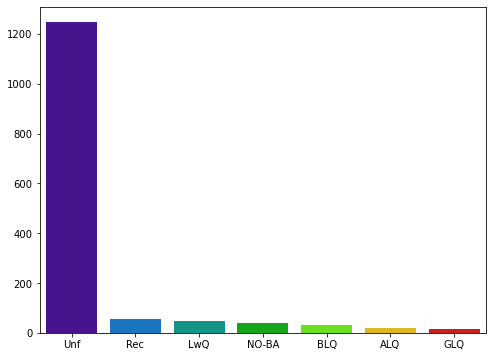

<Figure size 432x288 with 0 Axes>

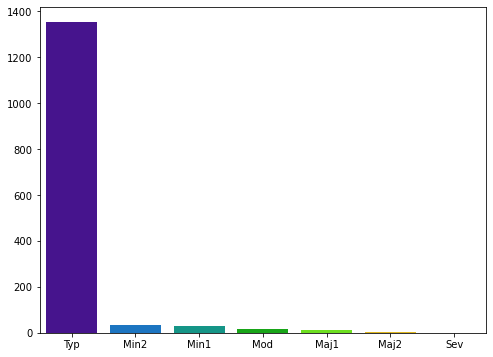

<Figure size 432x288 with 0 Axes>

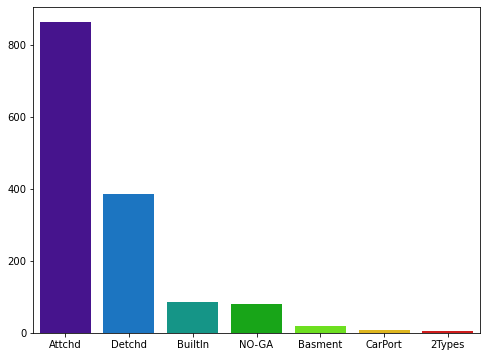

<Figure size 432x288 with 0 Axes>

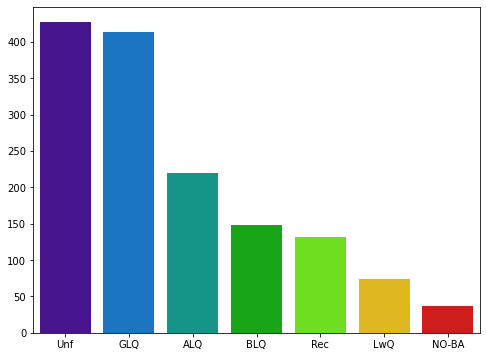

<Figure size 432x288 with 0 Axes>

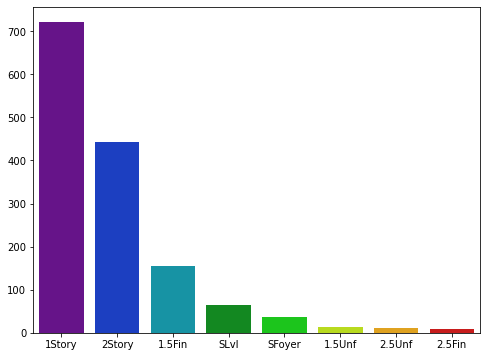

<Figure size 432x288 with 0 Axes>

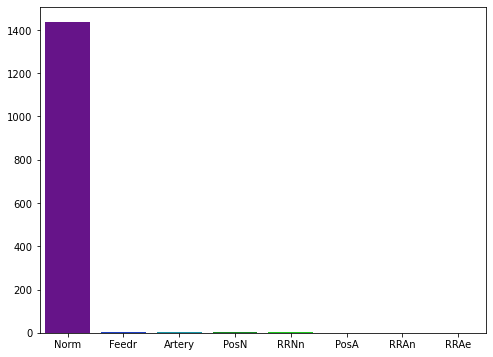

<Figure size 432x288 with 0 Axes>

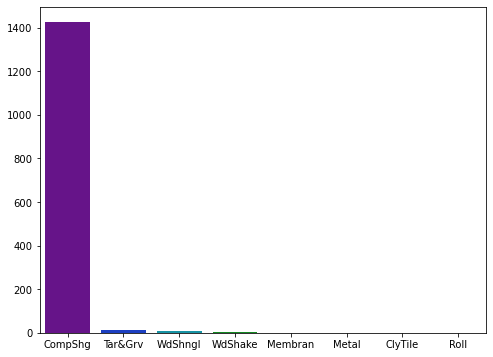

<Figure size 432x288 with 0 Axes>

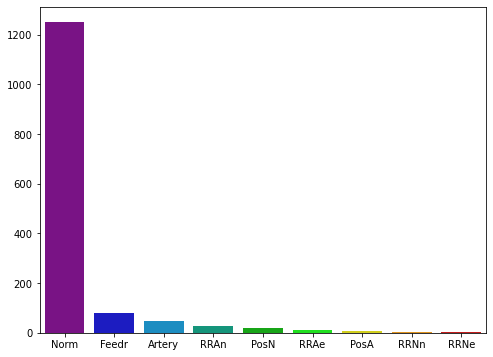

<Figure size 432x288 with 0 Axes>

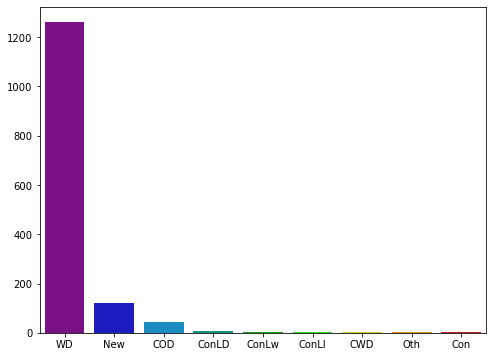

<Figure size 432x288 with 0 Axes>

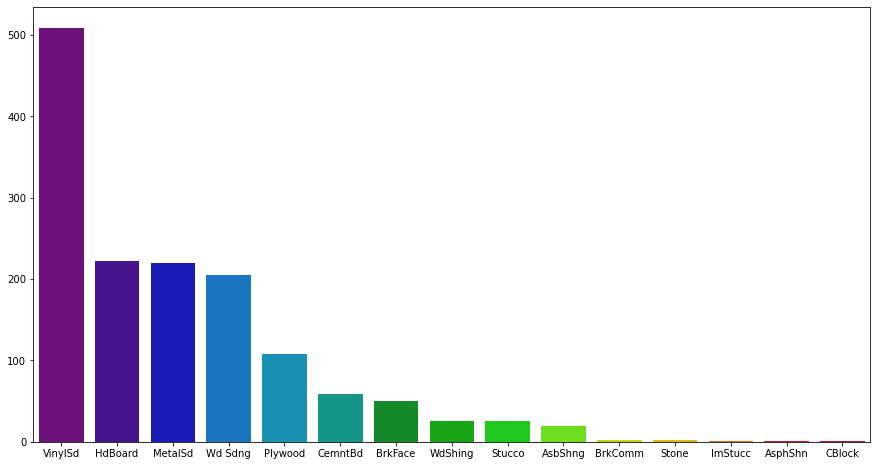

<Figure size 432x288 with 0 Axes>

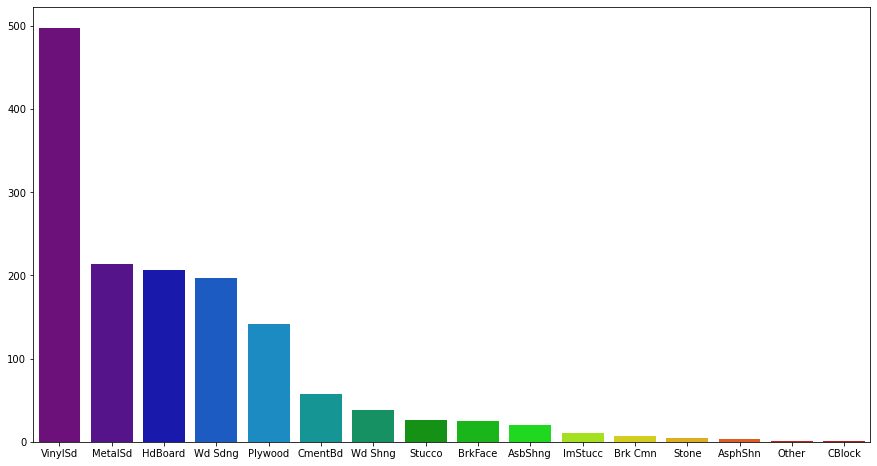

<Figure size 432x288 with 0 Axes>

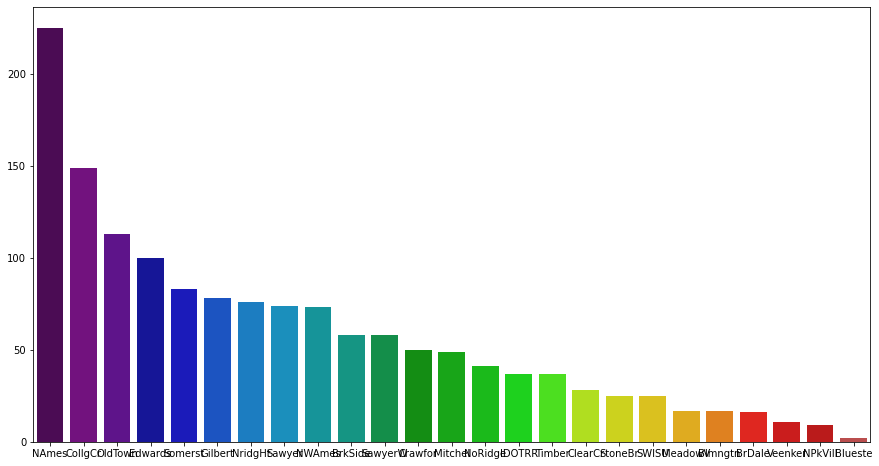

In [35]:
# Plotting box plot on all the categorical variables
for i, val in enumerate(unique_cat):
    if val<4:
        barplots(i, unique_cat.keys()[i], figsize = (7,5))
    elif val<10:
        barplots(i, unique_cat.keys()[i], figsize = (8,6))
    else:
        barplots(i, unique_cat.keys()[i], figsize = (15,8))

In [36]:
# Below given function is used to plot multiple boxplots graphs

def boxplots(idx, col, figsize=(10,4)):
    plt.figure(idx)
    plt.figure(figsize=figsize)
    sns.boxplot(surprise_house_data[col], palette=pat[random.randint(0,len(pat)-1)])
    plt.show()

<Figure size 432x288 with 0 Axes>

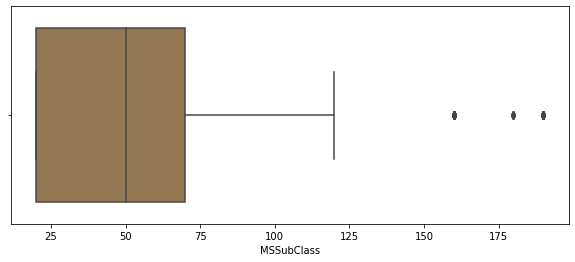

<Figure size 432x288 with 0 Axes>

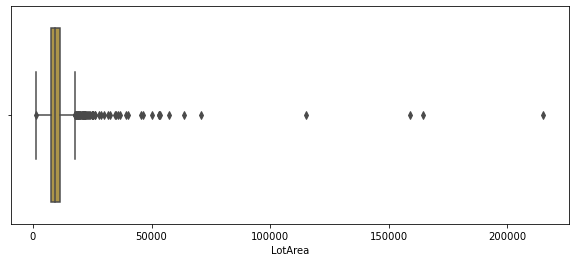

<Figure size 432x288 with 0 Axes>

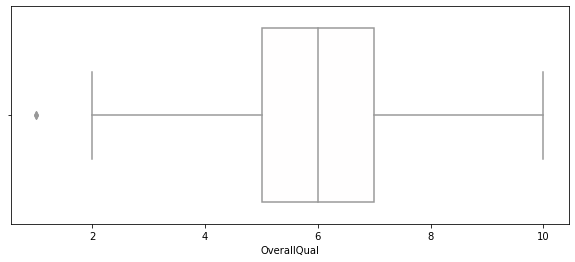

<Figure size 432x288 with 0 Axes>

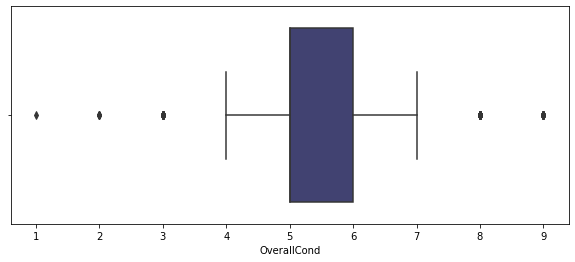

<Figure size 432x288 with 0 Axes>

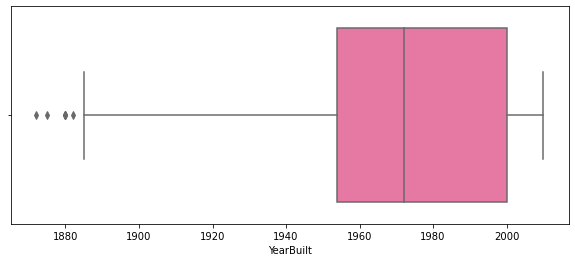

<Figure size 432x288 with 0 Axes>

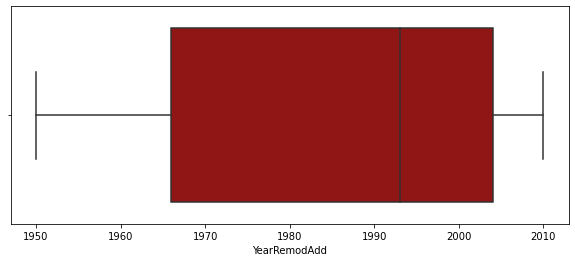

<Figure size 432x288 with 0 Axes>

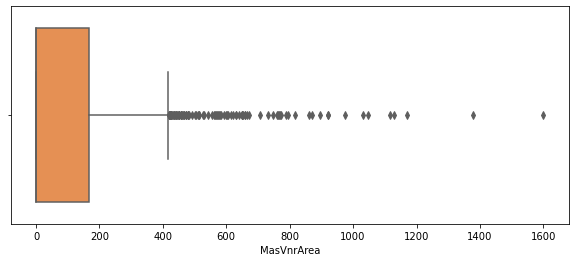

<Figure size 432x288 with 0 Axes>

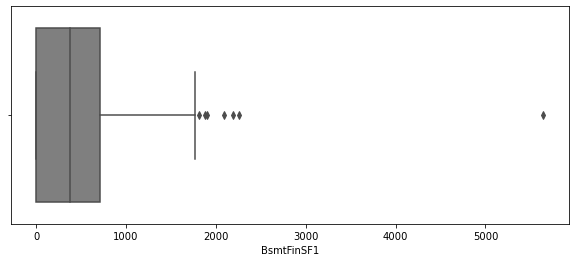

<Figure size 432x288 with 0 Axes>

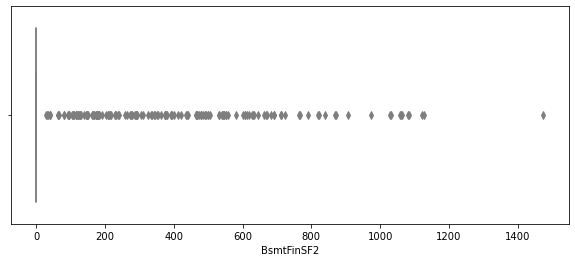

<Figure size 432x288 with 0 Axes>

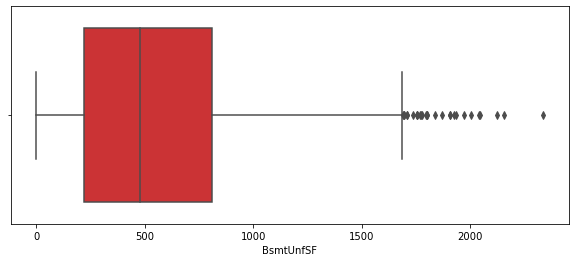

<Figure size 432x288 with 0 Axes>

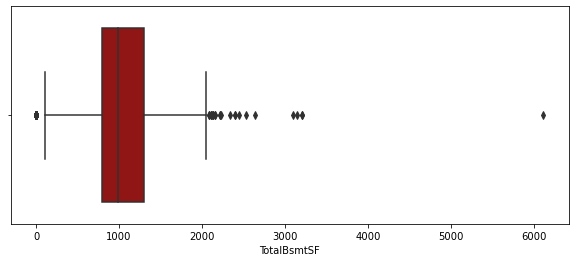

<Figure size 432x288 with 0 Axes>

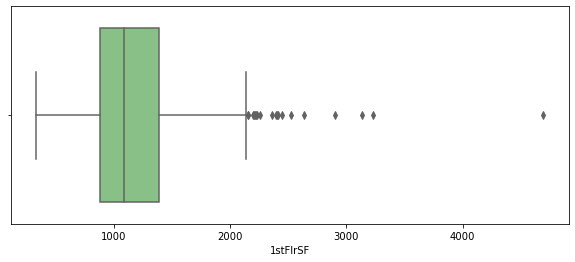

<Figure size 432x288 with 0 Axes>

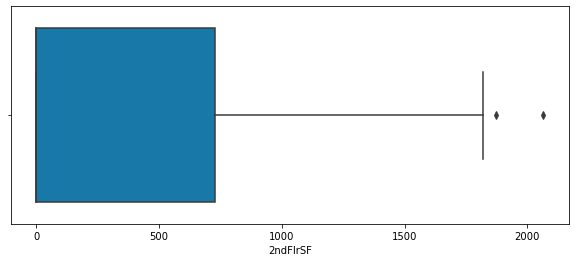

<Figure size 432x288 with 0 Axes>

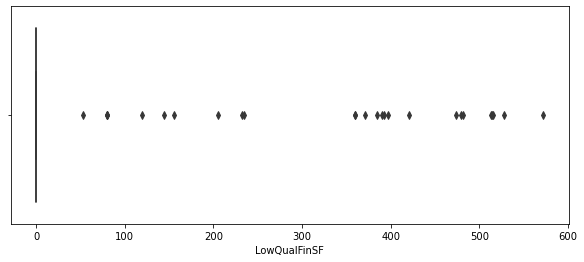

<Figure size 432x288 with 0 Axes>

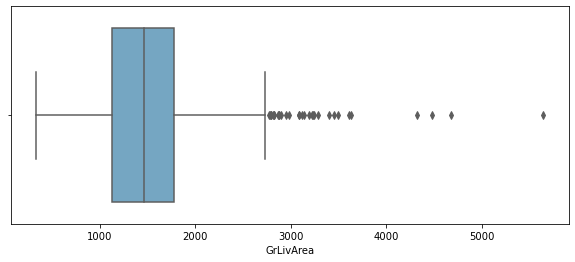

<Figure size 432x288 with 0 Axes>

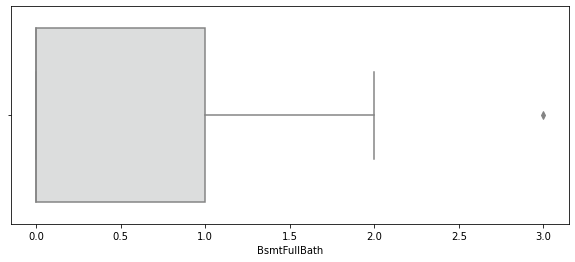

ValueError: No.

<Figure size 432x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

In [37]:
pat = 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
for i, col in enumerate(numeric.columns):
    boxplots(i, col)

In [ ]:
# Plotting a distribution plot on "SalePrice"
plt.figure(figsize=(10,6))
sns.distplot(surprise_house_data.SalePrice)
plt.show()

- We can see that SalePrice is Right skewed 
- To make correction we can use Log on it.

### b. Bivarent Analysis

In [ ]:
# This function is used to plot box plot for two variables. Here constant variable is SalePrice.
def bi_boxplot(idx, col, figsize = (7,7)):
    plt.figure(idx)
    plt.figure(figsize=figsize)
    sns.boxplot(x=col, y="SalePrice", data=surprise_house_data)
    plt.show()

In [ ]:
for i, val in enumerate(unique_cat):
    if val<4:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (7,5))
    elif val<10:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (8,6))
    else:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (15,8))

In [ ]:
# This function used to plot joinplots for two variables. Here constant variable is SalePrice
def joinplots(idx, col):
    plt.figure(idx)
    sns.jointplot(x=col, y="SalePrice", data=surprise_house_data)
    plt.show()

In [ ]:
for i, col in enumerate(numeric.columns):
    if col!="SalePrice":
        joinplots(i, col)

### c. Multivarent Analysis

In [ ]:
cor_house = surprise_house_data.corr()
cor_house

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_house, annot=True, linecolor="white", linewidths=1)
plt.show() 

- Here we can see that **'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'**
- Total of 13 variables have more than 0.4 correlation with **SalePrice**
- We will get some insight into these 13 variables

In [ ]:
high_coor = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']
len(high_coor)

In [ ]:
plt.figure(1)
ax = sns.pairplot(data = surprise_house_data, y_vars = 'SalePrice', x_vars=high_coor[:3] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(2)
ax = sns.pairplot(data = surprise_house_data, y_vars = 'SalePrice', x_vars=high_coor[3:6] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(3)
ax = sns.pairplot(data = surprise_house_data, y_vars = 'SalePrice', x_vars=high_coor[6:9] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(4)
ax = sns.pairplot(data = surprise_house_data, y_vars = 'SalePrice', x_vars=high_coor[9:] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.show()

- Plotting pair plot for those variables which show correlation above 60
- Here, we can see that when an increase in the OverallQual value increases the SalePrice. 
- Increase in  YearBuilt, YearRemodAdd, FullBath, TotRmsAbvGrd also increased the salePrice
- People usually prefer 'Fireplaces', 'GarageCars', 'GarageArea' in the mid than man. 

In [ ]:
coor_60 = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
len(coor_60)

In [ ]:
g = sns.pairplot(data = surprise_house_data, hue = 'SalePrice', vars=coor_60, palette="nipy_spectral")
plt.show()

## Data Preparation

In [ ]:
categorical.columns

In [ ]:
for i, val in enumerate(unique_cat):
    if val <=2:
        print(unique_cat.keys()[i] , val)

In [ ]:
# Street, CentralAir, Utilities have only two unique variables
surprise_house_data['Street'] = surprise_house_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
surprise_house_data['CentralAir'] = surprise_house_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)                                                 
surprise_house_data['Utilities'] = surprise_house_data['Utilities'].apply(lambda x : 1 if x == 'AllPub' else 0)


In [ ]:
# Getting only the categorical variables. 
categorical = surprise_house_data.select_dtypes(include=['object'])
categorical.shape

In [ ]:
# converting all the categorical variables into dummies
dummy_cat = pd.get_dummies(categorical, drop_first=True)
dummy_cat.head()

In [ ]:
categorical.columns

In [ ]:
# Dropping those categorical variables which are converted into dummies
surprise_house_data = surprise_house_data.drop(categorical.columns, axis=1)
surprise_house_data.shape

In [ ]:
# contacting the dummies and house_data
final_house_data = pd.concat([dummy_cat, surprise_house_data], axis=1)
final_house_data.shape

In [ ]:
final_house_data.sample()

In [ ]:
final_house_data.info()

## Splitting the Data into Training and Testing Sets

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
y = final_house_data.SalePrice
y.shape

In [ ]:
X = final_house_data.drop("SalePrice", axis=1)
X.shape

In [ ]:
np.random.seed(0)
# dividing the dataset into train and test with 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100)

In [ ]:
print(X_train.shape, X_test.shape)

### Rescalling feature of house dataframe
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 
- However, I m going to use Standardisation scal.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# getting the numerical variables which have dtype of 'int64','float64'
num_val = X_train.select_dtypes(include=['int64','float64']).columns
num_val

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train[num_val] = scaler.fit_transform(X_train[num_val])
X_test[num_val] = scaler.transform(X_test[num_val])

In [ ]:
X_train.describe()

## Building a model using Linear, Ridge and Lasso Regression

 
### Model A: Without log and scale on y.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

#### Implementing RFE

In [ ]:
# Building a Regression model.
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

In [ ]:
# Calculating the RFE
rfe = RFE(lin_reg, 20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# making a list of column names, support and ranking of RFE
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# converting the list to df and sorting by rank
rfe_df = pd.DataFrame(rfe_list, columns=["name", "support", "rank"])
rfe_df.sort_values(by = "rank")[0:22]

In [ ]:
col=X_train.columns[rfe.support_]
col

In [ ]:
X_train_rfe=X_train[col]

### Building linear model using statsmodel, for the detailed statistics

#### Model A1: Linear Model:

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

In [ ]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [ ]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- As we can see, it has high VIF values, and we can check the linear assumptions. 

In [ ]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [ ]:
residual = y_train - y_train_predict_linear

In [ ]:
sum(residual)

#### Normality of Errors:

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

In [ ]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- **linear model is violating all the Assumption** of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance 
- This indicates ***non linearity** is present, and also it shows **high VIF(multicollinearity)**
- Hence, we have to use either **Ridge or Lasso**.

In [ ]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

In [ ]:
# Root mean_squared_error value for train and test for Linear model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_predict_linear) ** 0.5)

## Model A2: Redge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

In [ ]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

In [ ]:
cv_results.columns

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [ ]:
# final ridge model with alpha as 40
ridge = Ridge(alpha=40)
ridge.fit(X_train, y_train)

In [ ]:
np.array(sorted(ridge.coef_, reverse=True))

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

In [ ]:
# Root mean_squared_error value for train and test
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

## Model A3: Lasso Regression

In [ ]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

In [ ]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 150)
plt.xticks(np.arange(0, 150, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [ ]:
#final lasso model
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

In [ ]:
np.array(sorted(lasso.coef_, reverse=True))

In [ ]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

In [ ]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

In [ ]:
residual = y_train - y_train_pred_lasso

In [ ]:
sum(residual)

#### Normality of Errors:

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### Error are independent of each other:

In [ ]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that Lasso model is **not violating** all the Assumption of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or **Residual is almost 0.**
- Error terms should have equal variance 
- Assumption still has some outliers, and this is because **SalePrice** columns, which have lots of outliers as we saw in EDA
- We will try to reduce it using **log on SalePrice** to reduce it as it shows the **right skewness** in the distplot.

## Ridge VS Lasso
### For Ridge:
**Alpha: 40**

**R-squared value for Ridge**
- Train:  0.872
- Test:  0.863

**mean_squared_error value**
- Train:  28281.329
- Test:  29422.777
******
### For Lasso:
**Alpha: 100**

**R-squared value**
- Train:  0.899
- Test:  0.867

**mean_squared_error value**
- Train:  25187.870
- Test:  29057.064

In [ ]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)

In [ ]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

In [ ]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

In [ ]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

## Model B: Log on SalePrice

In [ ]:
# orginal SalePrice without log
plt.figure(figsize=(7,4))
sns.distplot(surprise_house_data.SalePrice)
plt.show()

In [ ]:
# SalePrice with log
plt.figure(figsize=(7,4))
sns.distplot(np.log(surprise_house_data.SalePrice))
plt.show()

In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(y_train)
plt.show()

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(y_test)
plt.show()

## Model B1 (linear model)

In [ ]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

In [ ]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [ ]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [ ]:
residual = y_train - y_train_predict_linear

In [ ]:
sum(residual)

#### Normality of Errors:

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

In [ ]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that this **linear model is violating all the Assumption** of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance
- This indicates ***non linearity** is present, and also it shows **high VIF(multicollinearity)**
- Hence, we have to use either **Ridge or Lasso**.

In [ ]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

In [ ]:
# Root mean_squared_error value for train and test for Linear model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_predict_linear) ** 0.5)

## Model B2: Redge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

In [ ]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

In [ ]:
cv_results.columns

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [ ]:
# final ridge model with alpha as 20 but without log we get alpha as 40
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

In [ ]:
np.array(sorted(ridge.coef_, reverse=True))

In [ ]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

In [ ]:
# Root mean_squared_error value for train and test
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

In [ ]:
residual = y_train - y_train_pred_ridge

In [ ]:
sum(residual)

## Model B3: Lasso Regression

In [ ]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.00001,0.00008,0.00009, 0.0001, 0.0002, 0.0003, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

In [ ]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0.0, 0.001)
plt.xticks(np.arange(0.0, 0.001, 0.00005))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [ ]:
#final lasso model
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

In [ ]:
np.array(sorted(lasso.coef_, reverse=True))

In [ ]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

In [ ]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

In [ ]:
residual = y_train - y_train_pred_lasso

In [ ]:
sum(residual)

#### Normality of Errors:

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

In [ ]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that this Lasso model is not volilating all the Assumption of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0
- Error terms should have equal variance 

## Ridge VS Lasso after applying LOG
### For Ridge: 
**Alpha: 20**

**R-squared value for Ridge**
- Train:  0.910
- Test:  0.894

**mean_squared_error value**
- Train:  0.120
- Test:  0.129

******
### For Lasso:
**Alpha: 0.0001**

**R-squared value**
- Train:  0.948
- Test:  0.844

**mean_squared_error value**
- Train:  0.0913
- Test:   0.157


In [ ]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)

In [ ]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

### Getting Ridge coefs:

In [ ]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

### Top Ten Ridge coefficient are:

In [ ]:
ridge_coef[["col", "ridge_cof"]].reset_index(drop=True).head(10)

### Getting Lasso coefs:

In [ ]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

### Top Ten Lasso coefficient are:

In [ ]:
lasso_coef[["col", "lasso_cof"]].reset_index(drop=True).head(10)

## Model C: Log on SalePrice with StandardScaler()

In [ ]:
# reshaping the y_train to the matrix of (-1,1)
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)
y_train.shape

In [ ]:
# Scaling the data for y_train
scaler1 = StandardScaler()
y_train = scaler1.fit_transform(y_train)

In [ ]:
y_train1 = pd.DataFrame(y_train)
y_train1.describe()

In [ ]:
# reshaping the y_train to the matrix of (-1) or to its original shape
y_train = y_train.reshape(-1)
y_train.shape

In [ ]:
# reshaping the y_test to the matrix of (-1,1)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test.shape

In [ ]:
# Scaling the data for y_test
y_test = scaler1.transform(y_test)

In [ ]:
y_test1 = pd.DataFrame(y_test)
y_test1.describe()

In [ ]:
# reshaping the y_test to the matrix of (-1) or to its original shape
y_test = y_test.reshape(-1)
y_test.shape

In [ ]:
# checking the distribution plot for y_train
plt.figure(figsize=(7,4))
sns.distplot(y_train)
plt.show()

In [ ]:
# checking the distribution plot for y_test
plt.figure(figsize=(7,4))
sns.distplot(y_test)
plt.show()

## Model C1 (linear model)

In [ ]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

In [ ]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [ ]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [ ]:
residual = y_train - y_train_predict_linear

In [ ]:
sum(residual)

#### Normality of Errors:

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

In [ ]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that this linear model is volilating all the Assumption of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance 
- This indicates non linearitry is present and also it shows high VIF(multicolinearity) 
- We have to use either Ridge or Lasso

In [ ]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

## Model C2: Redge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

In [ ]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

In [ ]:
cv_results.columns

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [ ]:
# Final ridge model with alpha as 20 but with log we get same alpha

ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

In [ ]:
np.array(sorted(ridge.coef_, reverse=True))

In [ ]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

In [ ]:
# Root mean_squared_error value for train and test
print("mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

In [ ]:
residual = y_train - y_train_pred_ridge

In [ ]:
sum(residual)

#### Normality of Errors:

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### Error are independent of each other:

In [ ]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that this Ridge model is **not volilating** all the Assumption of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0. 
- Error terms should have equal variance 

## Model C3: Lasso Regression

In [ ]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.00001,0.00008,0.00009, 0.0001, 0.0002, 0.0003,0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 
0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

In [ ]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0.0, 0.001)
plt.xticks(np.arange(0.0, 0.001, 0.00005))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [ ]:
#final lasso model
alpha = 0.0003
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

In [ ]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

In [ ]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

In [ ]:
residual = y_train - y_train_pred_lasso

In [ ]:
sum(residual)

#### Normality of Errors:

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

In [ ]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- Here we can clearly see that this Lasso model is **not volilating** all the Assumption of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0. 
- Error terms should have equal variance 

## Ridge VS Lasso after applying LOG
### For Ridge: 
**Alpha: 20**

**R-squared value for Ridge**
- Train:  0.911
- Test:  0.894

**mean_squared_error value**
- Train:  0.299
- Test:  0.322

******
### For Lasso:
**Alpha: 0.0003**

**R-squared value**
- Train:  0.945
- Test:   0.857

**mean_squared_error value**
- Train:  0.235
- Test:   0.375


In [ ]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)

In [ ]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

### Getting Ridge coefs:

In [ ]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

### Top Ten Ridge coefficient are:

In [ ]:
ridge_coef[["col", "ridge_cof"]].reset_index(drop=True).head(10)

### Getting Lasso coefs:

In [ ]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

### Top Ten Lasso coefficient are:

In [ ]:
lasso_coef[["col", "lasso_cof"]].reset_index(drop=True).head(10)

## Model Conclusion


We can clearly say observed that Model C preformed the best and we will go with model C


## 15 Significant Attributes Required in Predicting the Price of a House

1. BsmtFinType2
2. LotArea
3. ExterQual
4. Exterior1st_BrkComm
5. Foundation_Wood
6. Exterior2nd_Wd Shng
7. LandSlope 
8. LotShape
9. Foundation_Slab
10. HeatingQC
11. OverallQual
12. BsmtCond
13. Exterior1st_AsphShn
14. PoolArea
15. Exterior1st_CBlock